[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## This is 5 Objects to Detect
 1. Books
 2. Plastic Glass
 3. Highlight Pen
 4. Scissors
 5. Glass Water

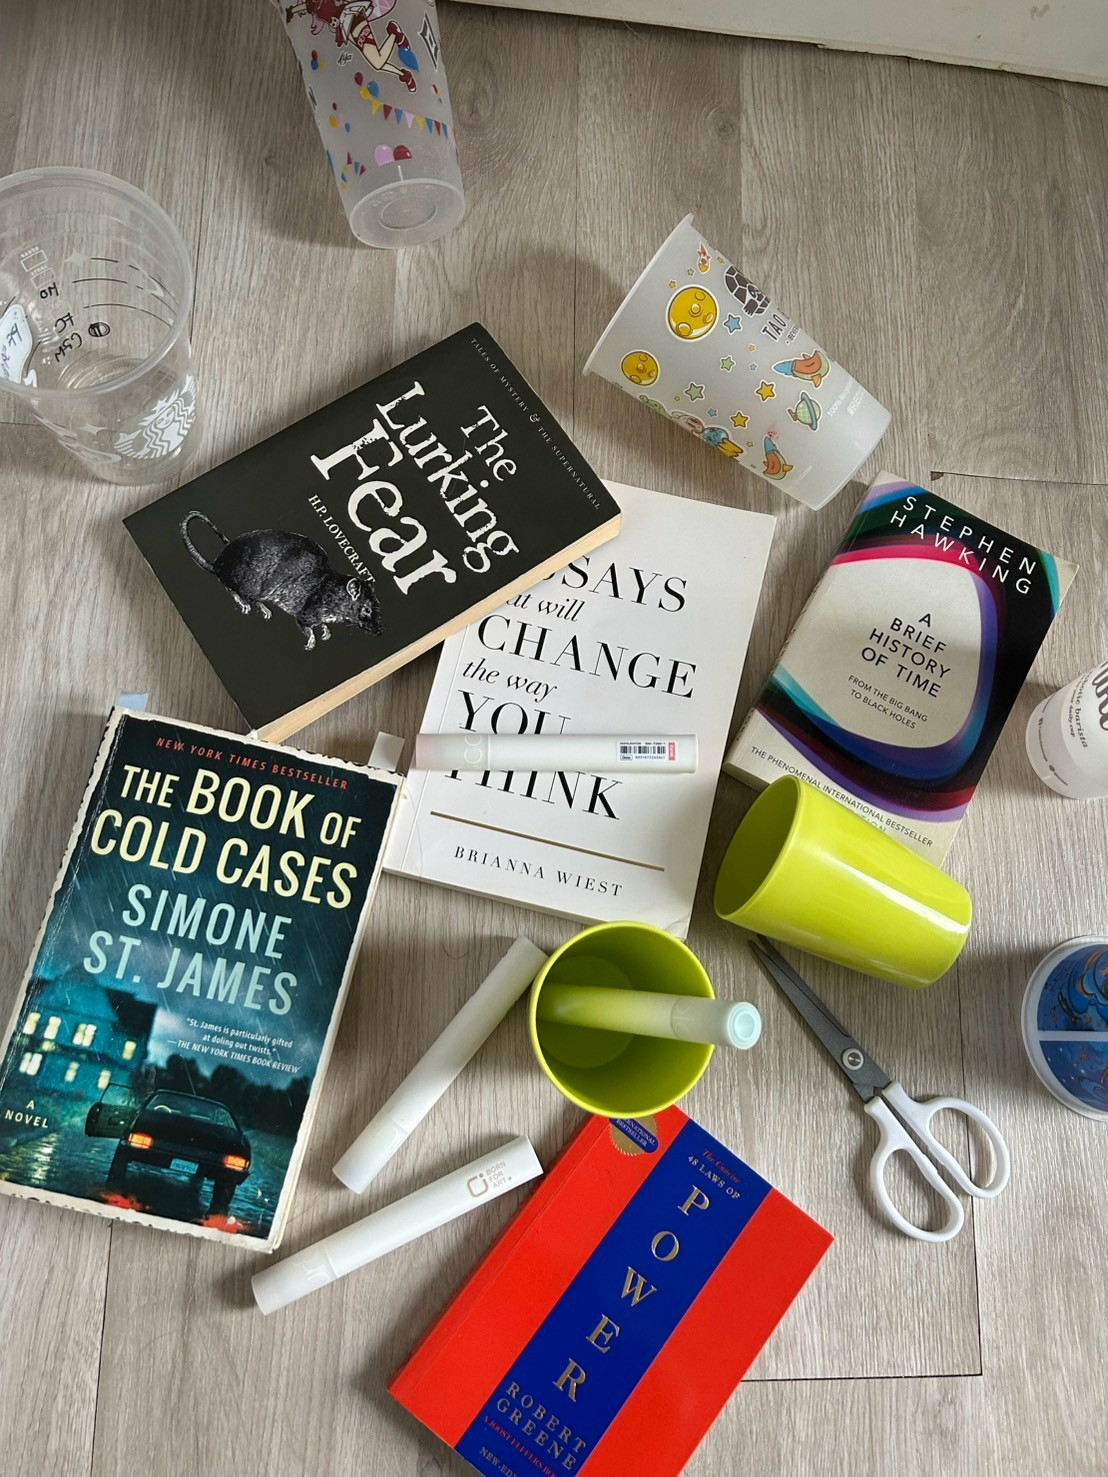

In [1]:
from IPython.display import Image, display
import requests
from io import BytesIO

url = "https://scontent.fbkk29-8.fna.fbcdn.net/v/t1.15752-9/483796462_1479161786391663_5375903957201191614_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=9f807c&_nc_ohc=c3TxDCX8j5cQ7kNvgFpaPci&_nc_oc=AdkgVc1ByyREyMaK24qNvBTiIon_5uDuUEqk6kKHCqzWSpqY0afinyRh0JYmI82q0FXxeQYo_JbU4WbIIsatbOD6&_nc_zt=23&_nc_ht=scontent.fbkk29-8.fna&oh=03_Q7cD1wGi5msjRP_10tCD4Ej0n4QKCTFoNZh3e_otmh-wZlsZog&oe=68039603"
response = requests.get(url)
img = Image(data=response.content)
display(img)

## About dataset

We splited data into 70%train 20%valid 10%test
เพิ่ม Outputs per training example (3 เท่า)

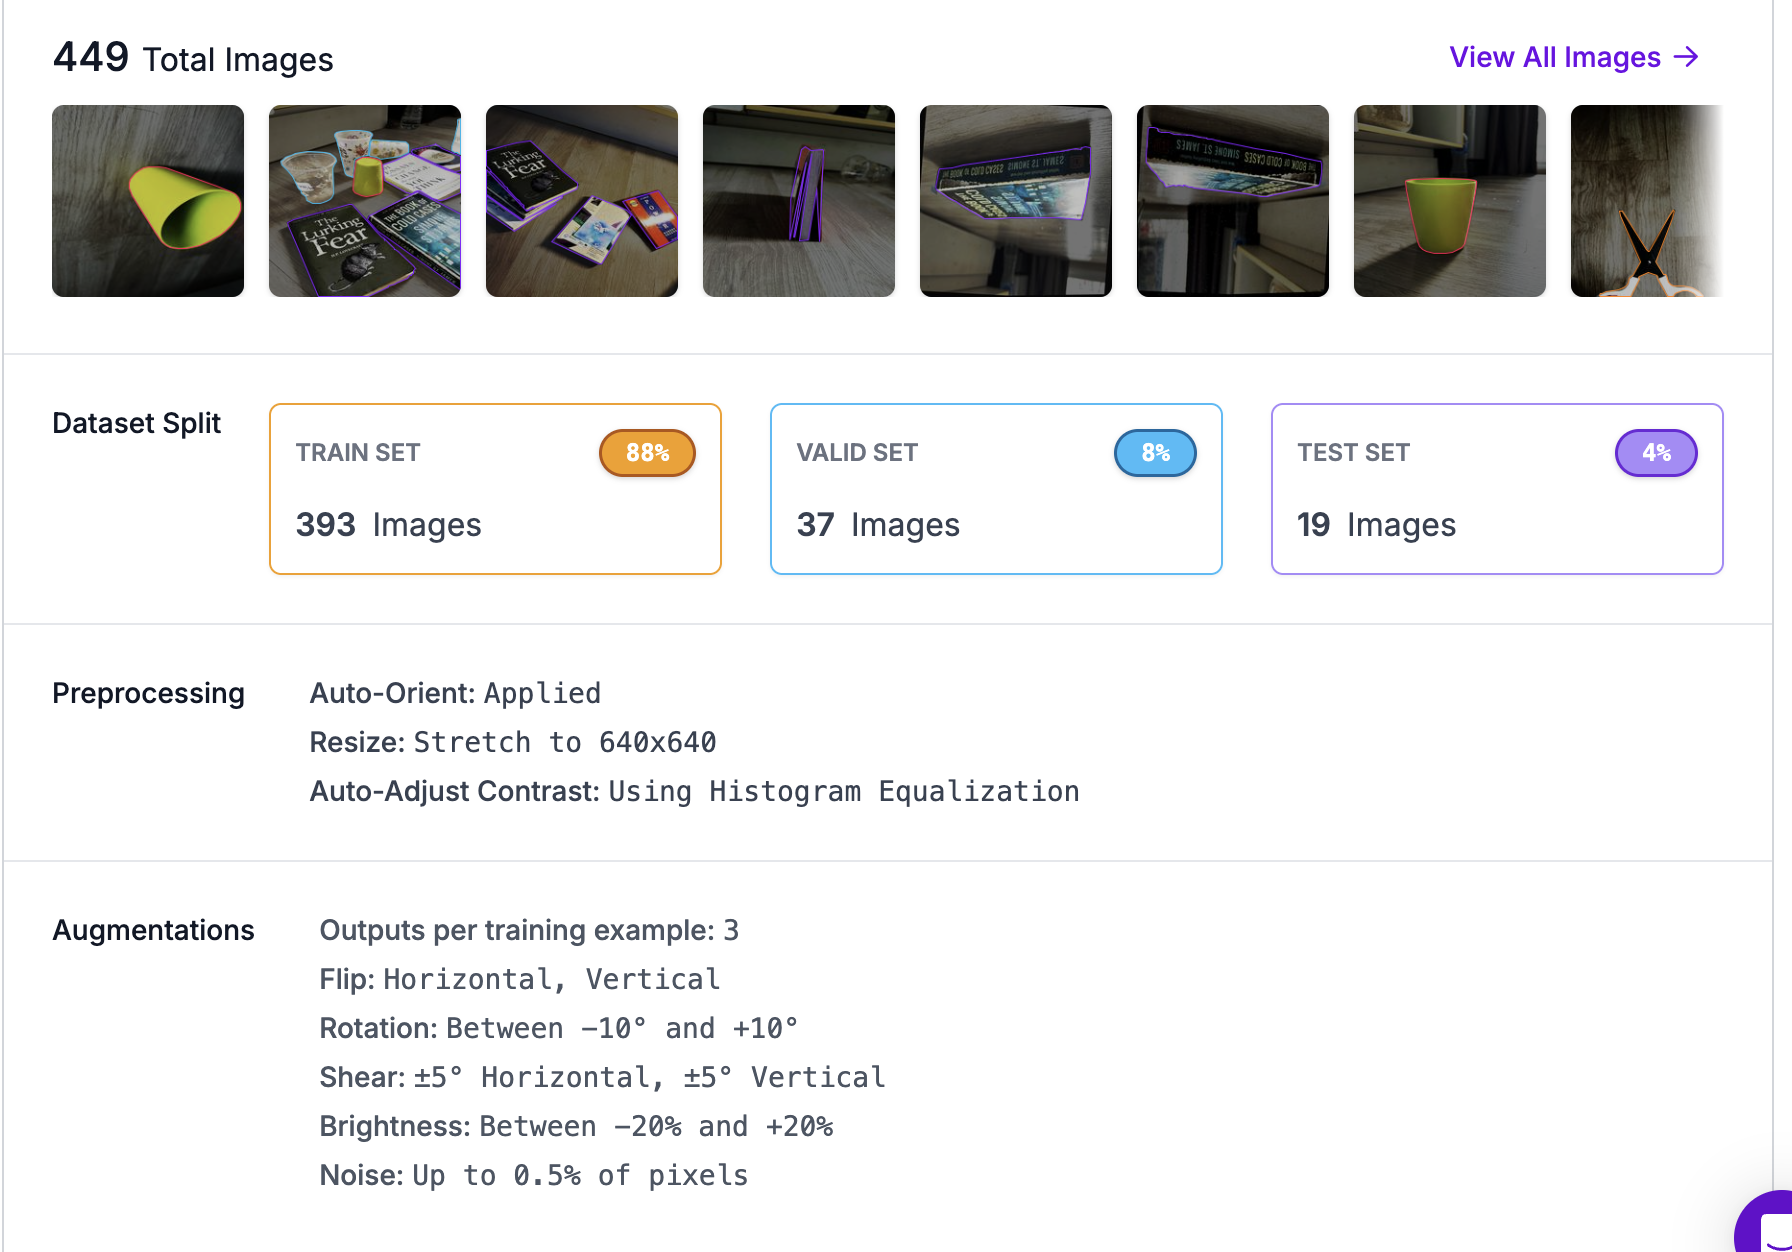

In [7]:
from IPython.display import Image, display
import requests
from io import BytesIO

url = "https://scontent.fbkk29-8.fna.fbcdn.net/v/t1.15752-9/483848195_507572995748975_7361795539398812679_n.png?_nc_cat=105&ccb=1-7&_nc_sid=9f807c&_nc_ohc=FK2vl9DJ3rwQ7kNvgHesG9Z&_nc_oc=Adn5md_x5PRoevdn-q5Ux4R3bxjp8MukQUCC_9oCFiDSe5P406oGqymI-HaL4NDwGkaFPqwJM-kdqixY7IOeaytd&_nc_zt=23&_nc_ht=scontent.fbkk29-8.fna&oh=03_Q7cD1wHrOPqWbOFDUOlXqt_sBaXLzkux-oBc5rMaYFHXlIkbbg&oe=6803A9B8"
response = requests.get(url)
img = Image(data=response.content)
display(img)

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Metal Performance Shaders

Since Macbook don't support NVIDIA Graphfic I need to install MPS support
lets PyTorch use the Apple Silicon GPU

In [1]:
%pip install torch torchvision

  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 9.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 9.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl (3.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Verify MPS avalibility

In [2]:
import torch
print(torch.backends.mps.is_available())  # Should return True

True


## Install Ultralytics (YOLO)

In [1]:
%pip install ultralytics

  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 8.9 MB/s eta 0:00:00
Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 9.8 MB/s eta 0:00:00ta 0:00:0

## Install ROBOFLOW

In [3]:
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 1.3 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Note: you may need to restart the kernel to use updated packages.


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.


In [2]:
import os 
HOME = os.getcwd()
print(HOME)

/Users/bam/Documents/Object Detection 🎐


In [8]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


## Fine-tune YOLO11 on custom dataset

NOTE: When training YOLOv11, make sure your data is located in datasets. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' settings.json. In this tutorial, we will use one of the datasets available on Roboflow Universe. When downloading, make sure to select the yolov11 export format.

In [ ]:
import os
from dotenv import load_dotenv
from roboflow import Roboflow

# โหลดตัวแปรจากไฟล์ .env
load_dotenv()

# ดึง API key จากตัวแปรสภาพแวดล้อม
api_key = os.getenv("ROBOFLOW_API_KEY")

# ใช้ API key กับ Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("your-workspace").project("your-project")
dataset = project.version(1).download("yolov8")

mkdir: 🎐: No such file or directory
[Errno 2] No such file or directory: '/Users/bam/Documents/Object Detection 🎐/datasets'
/Users/bam/Documents/Object Detection 🎐
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stuff-in-my-room-1 in yolov11:: 100%|██████████| 797/797 [00:00<00:00, 6515.10it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 batchs=